### <i> Задача 801 </i>
## Обеззараживание сточных вод. Моделирование методом Монте-Карло

In [182]:
import numpy as np
import matplotlib.pyplot as plt

In [183]:
# Параметры (в СИ)

N = 10000000    # Число испытаний
Nr = 20         # Число колец


LAMBDA = 0.2    # длина поглощения
A = 0.02        # радиус лампы
B = 0.12        # радиус трубы
W = 100         # мощность лампы
Q_min = 4000    # минимальная доза облучения


h = (B-A)/Nr

In [184]:
def GetPathLength(gamma):
    """
    Длина пробега
    """
    
    return -LAMBDA*np.log(1-gamma)


def GetJ(j, i):
    """
    Число поглощённых фотонов в i-том кольце
    """
    
    return len(j[j == i])

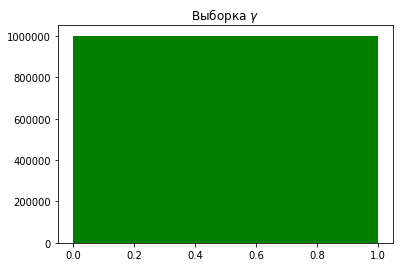

In [185]:
gamma = np.random.random(size = N)
_ = plt.hist(gamma, color = 'green')
_ = plt.title('Выборка $\gamma$')

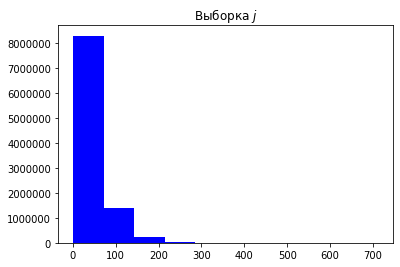

In [186]:
j = GetPathLength(gamma)//h+1
_ = plt.hist(j, color = 'blue')
_ = plt.title('Выборка $j$')

Доля поглотившихся фотонов: 39.34%


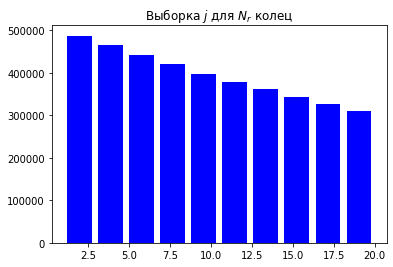

In [187]:
j = j[j <= Nr]
print("Доля поглотившихся фотонов: {:.2f}%".format(100*len(j)/N))
_ = plt.hist(j, rwidth = 0.8, color = 'blue')
_ = plt.title('Выборка $j$ для $N_r$ колец')

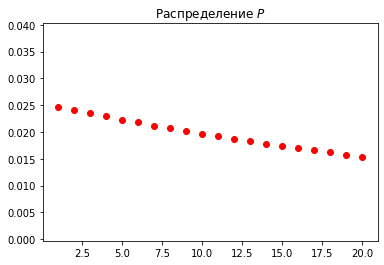

In [188]:
p = np.array([GetJ(j, i)/(2*np.pi*(A+(i+0.5)*h)*h*N) for i in range(1, Nr+1)])
plt.scatter(range(1, Nr+1), [GetJ(j, i)/N for i in range(1, Nr+1)], color = 'red')
_ = plt.title("Распределение $P$")

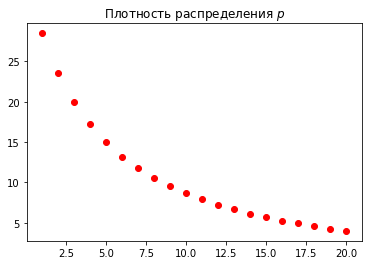

In [189]:
plt.scatter(range(1, Nr+1), p, color = 'red')
_ = plt.title("Плотность распределения $p$")

In [190]:
print("min p_j = " , min(p))

v = W*min(p)/Q_min
print("v = " , v)

print("Ответ: ", v*np.pi*(B-A)*(B+A))

min p_j =  3.989345322940819
v =  0.09973363307352048
Ответ:  0.004386514285714287


### Полученная производительность установки:

$$ 4.4 \cdot 10^{-3} \frac{м^3}{с} = 15.8 \frac{м^3}{час}$$

### Исследуем на сходимость

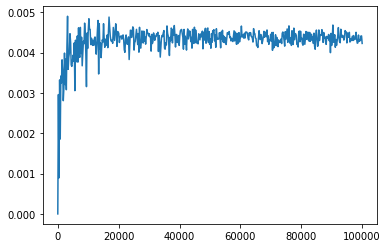

In [191]:
Ns = np.linspace(1, 100000, 500)
res = []
for N in Ns:
    gamma = np.random.random(size = int(N))
    j = GetPathLength(gamma)//h+1
    j = j[j <= Nr]
    p = np.array([GetJ(j, i)/(2*np.pi*(A+(i+0.5)*h)*h*N) for i in range(1, Nr+1)])
    v = W*min(p)/Q_min
    res.append(v*np.pi*(B-A)*(B+A))
    
    
plt.plot(Ns, res)